In [105]:
#問題１

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X, y = load_iris(as_frame=True, return_X_y=True)
X_1 = X.loc[:, ['sepal length (cm)', 'petal length (cm)']]
X_1



,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [141]:

# y = y.copy()
# y = y.rename('Species')
# df = pd.DataFrame(y)
# df.loc[df['Species'] == 0, 'Species'] = "setosa"
# df.loc[df['Species'] == 1, 'Species'] = "versicolor"
# df.loc[df['Species'] == 2, 'Species'] = "virginica"
# df_1 = df[(df['Species'] == "versicolor") | (df['Species'] == "virginica")] 
# df_1

y1 = y[50:]
y1


50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 100, dtype: int64

Text(0, 0.5, 'petal length (cm)')

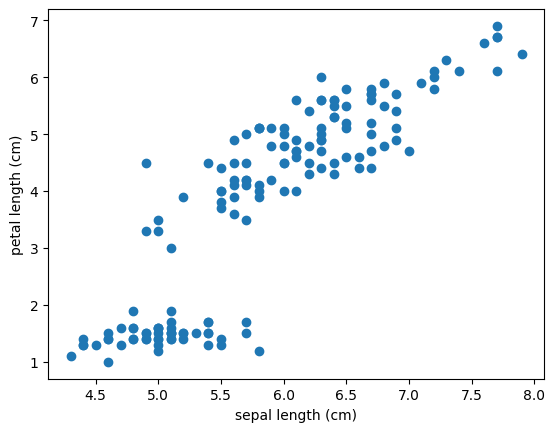

In [142]:
#問題２

import matplotlib.pyplot as plt

plt.scatter(X_1['sepal length (cm)'], X_1['petal length (cm)'])
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")


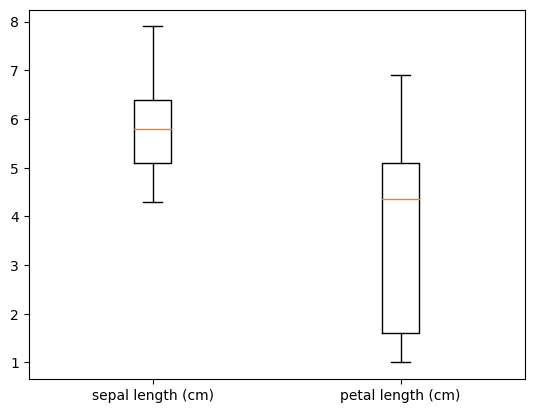

In [143]:

label = X_1.columns.values
plt.boxplot(X_1, labels=label)

plt.show()


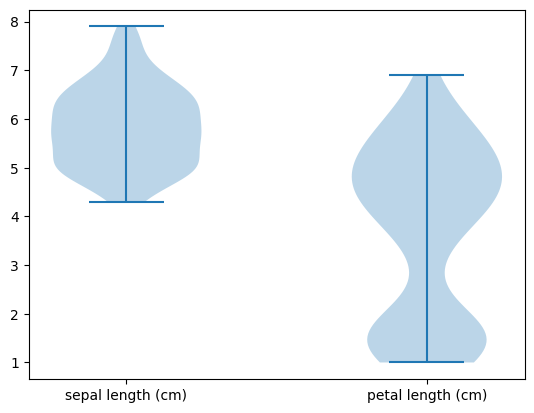

In [144]:

fig, ax = plt.subplots()
ax.violinplot(X_1, positions=[1, 2])
ax.set_xticks([1, 2])
ax.set_xticklabels(label)
plt.show()


In [145]:
from sklearn.model_selection import train_test_split

X = X_1.iloc[50:,:].values
y = y1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [146]:
#問題４

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.fit_transform(X_test)


In [171]:
#問題５

from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=5)
neigh1.fit(X_std_train, y_train)
 

KNeighborsClassifier()

In [172]:

y_pred1 = neigh.predict(X_std_test)
y_pred1


array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1])

In [173]:
#3-nn

neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_std_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [174]:

y_pred2 = neigh.predict(X_std_test)
y_pred2


array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1])

In [175]:
# 1-nn

neigh3 = KNeighborsClassifier(n_neighbors=1)
neigh3.fit(X_std_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [176]:

y_pred3 = neigh.predict(X_std_test)
y_pred3


array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1])

In [156]:
#問題６

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

print('正解率: ', round(accuracy_score(y_true=y_test, y_pred=y_pred1),2))
print('適合率: ', round(precision_score(y_true=y_test, y_pred=y_pred1),2))
print('再現率: ', round(recall_score(y_true=y_test, y_pred=y_pred1),2))
print('F値: ',  round(f1_score(y_true=y_test, y_pred=y_pred1),2))

print(classification_report(y_test, y_pred1))


正解率:  0.92
適合率:  0.9
再現率:  0.9
F値:  0.9
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [170]:
from sklearn.metrics import confusion_matrix

y_test1 = y_test.map({1: "versicolor", 2: "virginica"})
y_pred_df = pd.Series(y_pred1)
y_pred4 = y_pred_df.map({1: "versicolor", 2: "virginica"})

labels = ["versicolor", "virginica"]
cm = confusion_matrix(y_test1, y_pred4, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)
cm


,pred_versicolor,pred_virginica
act_versicolor,9,1
act_virginica,1,14



- 正解率：全データの中で予測した結果が実際に正解であった割合。
- 適合率：予測した分類の中で実際に正解した割合。
- 再現率：実際の正解の中で予測した結果が正しく正解を言い当てている割合。
- F値：適合率と再現率を均等に評価するための調和平均。


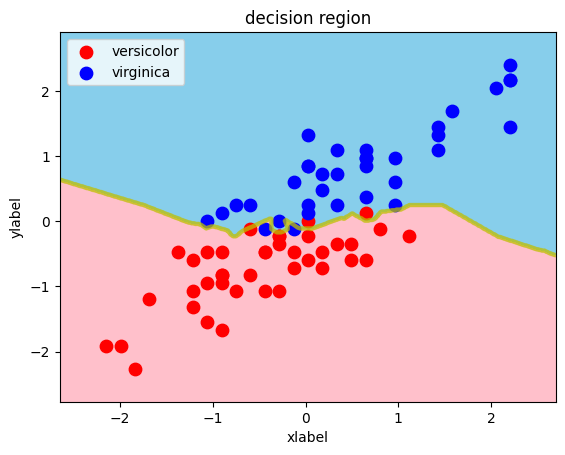

In [179]:
#問題７

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_std_train, y_train, neigh1)


              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.93      0.87      0.90        15

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

[[ 9  1]
 [ 2 13]]


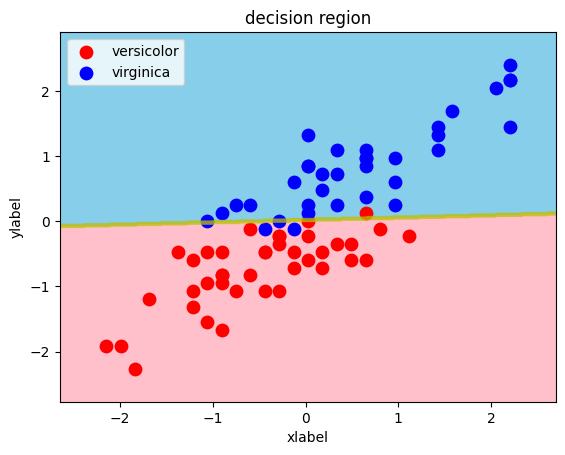

In [188]:
#問題８
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_std_train, y_train)
y_pred_clf = clf.predict(X_std_test)

print(classification_report(y_test, y_pred_clf))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_clf  # 予測値
                      ))

decision_region(X_std_train, y_train, clf)


              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.93      0.87      0.90        15

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

[[ 9  1]
 [ 2 13]]


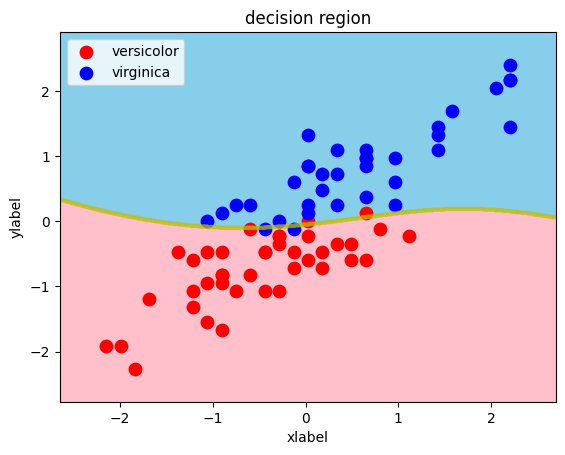

In [201]:
#SVM
from sklearn import svm
from sklearn.svm import SVC

svm = svm.SVC()
svm.fit(X_std_train, y_train)

y_pred_svm = svm.predict(X_std_test)

print(classification_report(y_test, y_pred_svm))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_svm  # 予測値
                      ))

decision_region(X_std_train, y_train, svm)


              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.93      0.87      0.90        15

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

[[ 9  1]
 [ 2 13]]


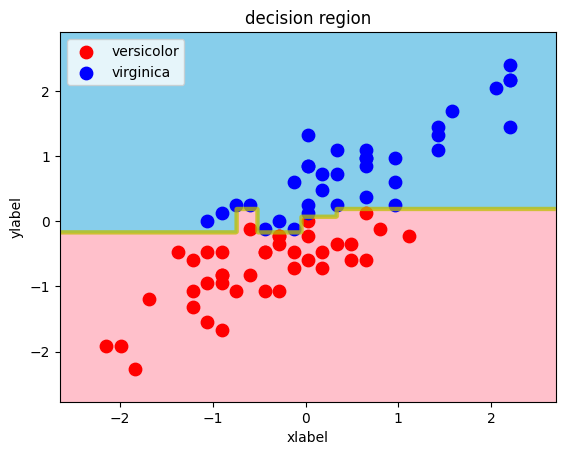

In [194]:
#決定木
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_std_train, y_train)

y_pred_tree = tree.predict(X_std_test)

print(classification_report(y_test, y_pred_tree))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_tree  # 予測値
                      ))

decision_region(X_std_train, y_train, tree)


              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.93      0.87      0.90        15

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

[[ 9  1]
 [ 2 13]]


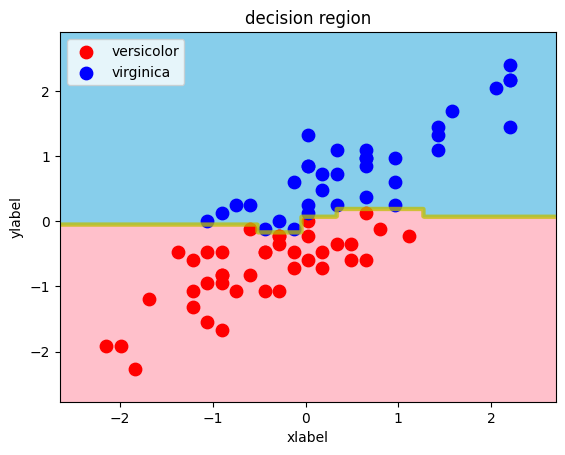

In [195]:
#ランダムフォレスト

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_std_train, y_train)

y_pred_clf = clf.predict(X_std_test)

print(classification_report(y_test, y_pred_clf))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_clf  # 予測値
                      ))

decision_region(X_std_train, y_train, clf)


In [200]:
#まとめ

comparison = pd.DataFrame([[0.92, 0.88, 0.88, 0.88, 0.88]],
             columns=['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'],
             index=['正解率'])

comparison


,最近傍法,ロジスティック回帰,SVM,決定木,ランダムフォレスト
正解率,0.92,0.88,0.88,0.88,0.88


- 上記表より各モデルによる正解率の比較検証の結果、最近傍法の推定による正解率が一番高かった。
- 最近傍法及びSVMにおける境界線は滑らかな曲線であるが、ロジスティック回帰は直線であり、決定木とランダムフォレストでは凹凸がある直線であった。


              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

[[ 9  1]
 [ 1 14]]


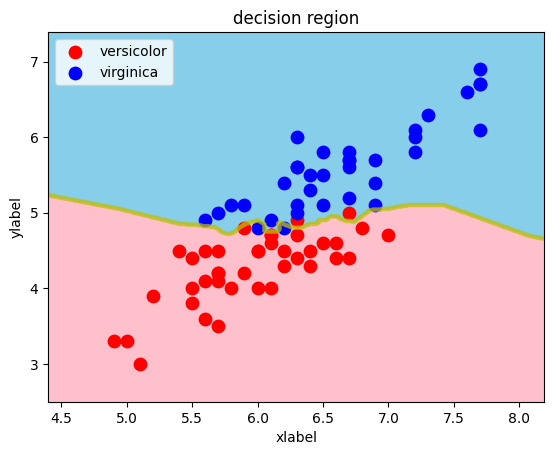

In [204]:
#問題９
#最近傍法（前処理なし）

neigh1.fit(X_train, y_train)
y_pred5 = neigh1.predict(X_test)

print(classification_report(y_test, y_pred5))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred5  # 予測値
                      ))

decision_region(X_train, y_train, neigh1)



              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.93      0.87      0.90        15

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

[[ 9  1]
 [ 2 13]]


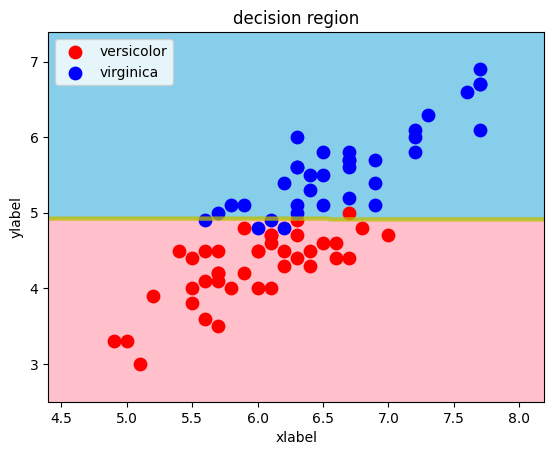

In [207]:
#ロジスティック回帰（前処理なし）

clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_clf1 = clf1.predict(X_test)

print(classification_report(y_test, y_pred_clf1))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_clf1  # 予測値
                      ))

decision_region(X_train, y_train, clf1)


              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

[[ 9  1]
 [ 1 14]]


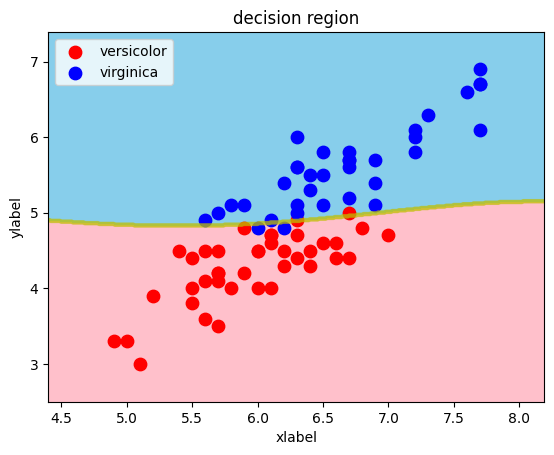

In [210]:
#SVM（前処理なし）
from sklearn import svm
from sklearn.svm import SVC

svm1 = svm.SVC()
svm1.fit(X_train, y_train)

y_pred_svm1 = svm1.predict(X_test)

print(classification_report(y_test, y_pred_svm1))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_svm1  # 予測値
                      ))

decision_region(X_train, y_train, svm1)


              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.93      0.87      0.90        15

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

[[ 9  1]
 [ 2 13]]


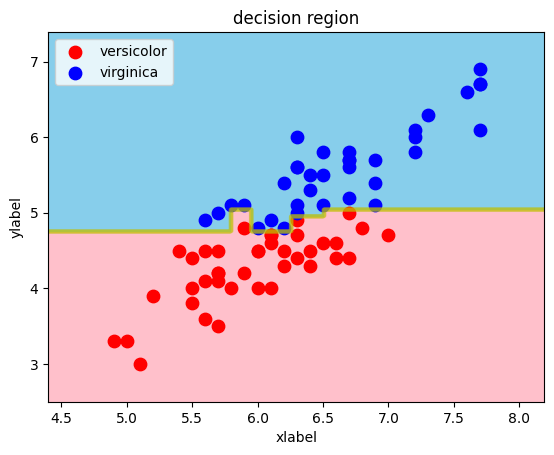

In [212]:
#決定木（前処理なし）

tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, y_train)

y_pred_tree1 = tree1.predict(X_test)

print(classification_report(y_test, y_pred_tree1))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_tree1  # 予測値
                      ))

decision_region(X_train, y_train, tree1)


              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.93      0.87      0.90        15

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

[[ 9  1]
 [ 2 13]]


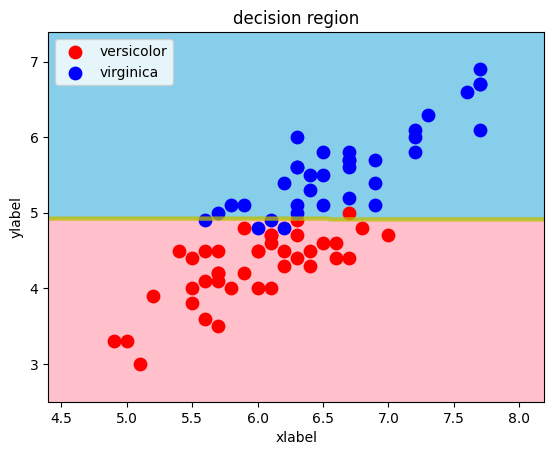

In [213]:
#ランダムフォレスト（前処理なし）

clf1 = RandomForestClassifier(random_state=0)
clf1.fit(X_train, y_train)

y_pred_clf1 = clf1.predict(X_test)

print(classification_report(y_test, y_pred_clf1))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_clf1  # 予測値
                      ))

decision_region(X_train, y_train, clf)


In [214]:
#まとめ

comparison = pd.DataFrame([[0.92, 0.88, 0.92, 0.88, 0.88]],
             columns=['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'],
             index=['正解率'])

comparison


,最近傍法,ロジスティック回帰,SVM,決定木,ランダムフォレスト
正解率,0.92,0.88,0.92,0.88,0.88


- SVM手法については前処理をしない方が正解率が上がった。各手法における決定領域を見ていくと、境界線が前処理なしの方がアバウトになっている様に見受けられる。
- 各指標を比較しても大きな差が見られないのはそもそものデータが外れ値を多く含んでいないことと、そもそも決定木系のアルゴリズムは標準化は意味をなさないため変化が見られないと思われる。
- 標準化の前処理は外れ値の影響を最大限減らしてモデルの学習精度を向上させるために行われる。

In [238]:
#問題１０
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


iris = datasets.load_iris()
data = iris.data[:, [0, 2]]
label = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size=0.25, stratify=label, random_state=0
)

X_train.shape

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

neigh2 = KNeighborsClassifier(n_neighbors=5)  #最近傍法
neigh2.fit(X_train_std, y_train)
y_pred_n = neigh2.predict(X_std_test)

clf2 = LogisticRegression(random_state=0).fit(X_train_std, y_train)  #ロジスティック回帰
y_pred_clf2 = clf2.predict(X_std_test)

svm2 = svm.SVC()
svm2.fit(X_train_std, y_train)  #SVM
y_pred_svm2 = svm2.predict(X_test_std)

tree2 = DecisionTreeClassifier(random_state=0)  #決定木
tree2.fit(X_train_std, y_train)
y_pred_tree2 = tree2.predict(X_test_std)

clf_2 = RandomForestClassifier(random_state=0)  #ランダムフォレスト
clf_2.fit(X_train_std, y_train)
y_pred_clf_2 = clf_2.predict(X_test_std)
y_pred_clf_2


array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

In [241]:
#最近傍法

neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(X_train_std, y_train)
y_pred_n = neigh2.predict(X_test_std)

print(classification_report(y_test, y_pred_n))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_n  # 予測値
                      ))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


In [276]:
#ロジスティック回帰

clf2 = LogisticRegression(random_state=0).fit(X_train_std, y_train)
y_pred_clf2 = clf2.predict(X_test_std)

print(classification_report(y_test, y_pred_clf2))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_clf2  # 予測値
                      ))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      0.92      0.89        13
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

[[13  0  0]
 [ 0 12  1]
 [ 0  2 10]]


In [277]:
#SVM

svm2 = svm.SVC()
svm2.fit(X_train_std, y_train)

y_pred_svm2 = svm2.predict(X_test_std)

print(classification_report(y_test, y_pred_svm2))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_svm2  # 予測値
                      ))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      1.00      0.93        13
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38

[[13  0  0]
 [ 0 13  0]
 [ 0  2 10]]


In [278]:
#決定木

tree2 = DecisionTreeClassifier(random_state=0)
tree2.fit(X_train_std, y_train)

y_pred_tree2 = tree2.predict(X_test_std)

print(classification_report(y_test, y_pred_tree2))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_tree2  # 予測値
                      ))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38

[[13  0  0]
 [ 0 13  0]
 [ 0  3  9]]


In [279]:
#ランダムフォレスト

clf_2 = RandomForestClassifier(random_state=0)
clf_2.fit(X_train_std, y_train)

y_pred_clf_2 = clf_2.predict(X_test_std)

print(classification_report(y_test, y_pred_clf_2))

print(confusion_matrix(y_true=y_test,     # 実測値
                       y_pred=y_pred_clf2  # 予測値
                      ))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      1.00      0.93        13
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38

[[13  0  0]
 [ 0 12  1]
 [ 0  2 10]]


In [280]:

comparison = pd.DataFrame([[0.97, 0.92, 0.95, 0.92, 0.95]],
             columns=['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'],
             index=['正解率'])

comparison


,最近傍法,ロジスティック回帰,SVM,決定木,ランダムフォレスト
正解率,0.97,0.92,0.95,0.92,0.95


- 上記より３クラス分類においても最近傍法による正解率が一番良い結果となった。

- 境界領域の3値分類は分かりませんでした。